# Chapter 7 Problem 4 (Gelman & Hill)

*Predictive simulation for linear regression: take one of the models from Exercise 3.5 or 4.8 that predicts course evaluations from beauty and other input variables. You will do some simulations.*

### Part A

*Instructor A is a 50-year-old woman who is a native English speaker and has a beauty score of −1. Instructor B is a 60-year-old man who is a native English speaker and has a beauty score of −0.5. Simulate 1000 random draws of the course evaluation rating of these two instructors. In your simulation, account for the uncertainty in the regression parameters (that is, use the `sim()` function) as well as the predictive uncertainty.*

In [12]:
require(arm)
require(ggplot2)
require(foreign)

prof <- read.csv("http://www.stat.columbia.edu/~gelman/arm/examples/beauty/ProfEvaltnsBeautyPublic.csv")

# convert into factors
prof$profnumber <- as.factor(prof$profnumber)
prof$female <- as.factor(prof$female)

# convert dummy `class*` variables into a factor
dummies <- prof[, 18:47]
prof$class <- factor(apply(dummies, FUN=function(r) r %*% 1:30, MARGIN=1))

# remove dummy variables
prof <- prof[-c(18:47)]

# normalise and centre professor evaluation (all other predictors are binary)
prof$c.profevaluation <- prof$profevaluation - mean(prof$profevaluation) / (2 * sd(prof$profevaluation))

# fit linear model
m1 <- lm(courseevaluation ~ female + onecredit + c.profevaluation*nonenglish, data=prof)
display(m1)

lm(formula = courseevaluation ~ female + onecredit + c.profevaluation * 
    nonenglish, data = prof)
                            coef.est coef.se
(Intercept)                  3.69     0.01  
female1                     -0.03     0.02  
onecredit                    0.10     0.04  
c.profevaluation             0.94     0.02  
nonenglish                  -0.08     0.04  
c.profevaluation:nonenglish -0.17     0.09  
---
n = 463, k = 6
residual sd = 0.19, R-Squared = 0.88


In [13]:
n.sims <- 1000
sim1 <- sim(m1, n.sims)

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.
stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


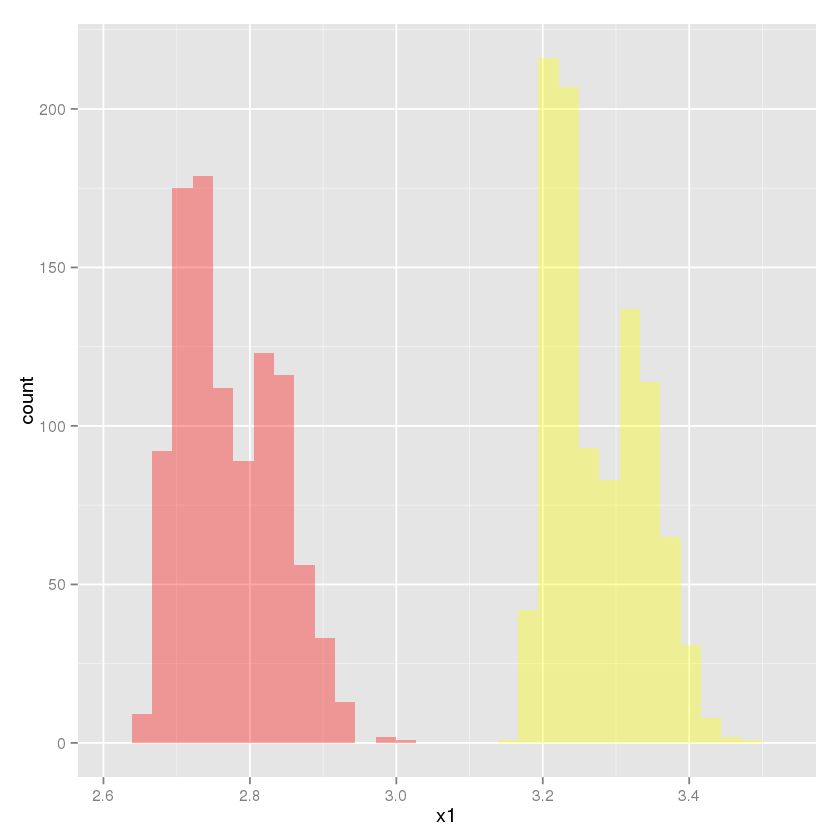

In [14]:
# Instructor A: 50-year-old woman who is a native English speaker and has a beauty score of −1 
sim.outcome <- coef(sim1)[, 1] + 1 * coef(sim1)[, 2] + 
    rep(c(0,1), 500) * coef(sim1)[, 3] + -1 *coef(sim1)[, 4] + 
    0 * coef(sim1)[, 5] + -1 * 0 * coef(sim1)[, 6] 

# Instructor B: 60-year-old man who is a native English speaker and has a beauty score of −0.5 
sim.outcome2 <- coef(sim1)[, 1] + 0 * coef(sim1)[, 2] + 
    rep(c(0,1), 500) * coef(sim1)[, 3] + -.5 * coef(sim1)[, 4] + 
    0 * coef(sim1)[, 5] + -.5 * 0 * coef(sim1)[, 6] 

ggplot(data=data.frame(x1=sim.outcome, x2=sim.outcome2)) + 
    geom_histogram(aes(x=x1), fill="red", alpha=.35) +
    geom_histogram(aes(x=x2), fill="yellow", alpha=.35)

### Part B 

*Make a histogram of the difference between the course evaluations for A and B. What is the probability that A will have a higher evaluation?*

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


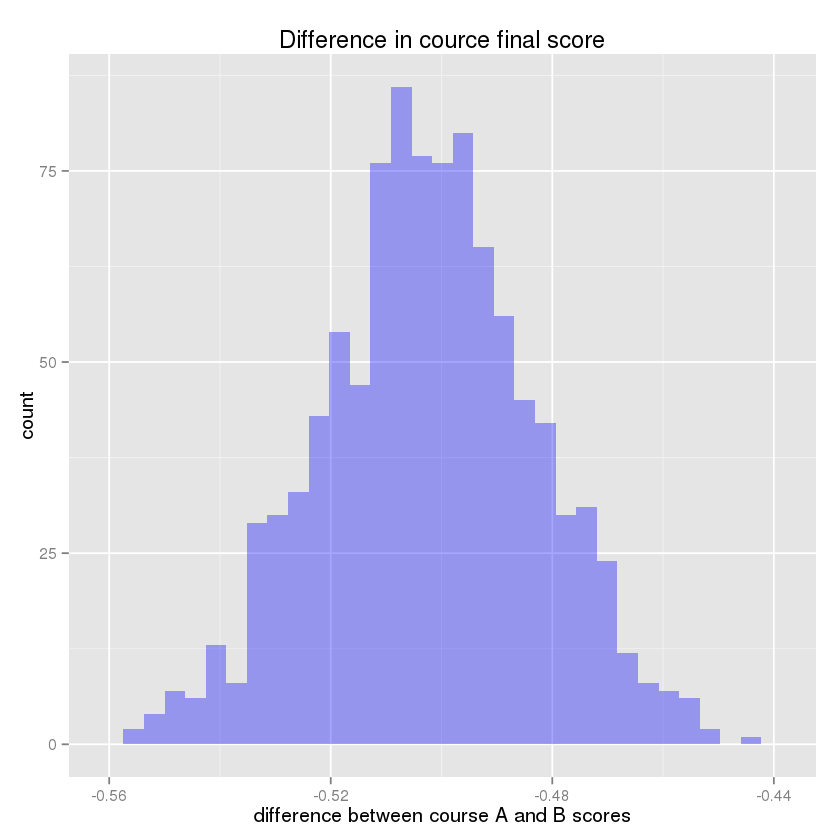

In [31]:
sim.diff <- sim.outcome - sim.outcome2
ggplot(data=data.frame(x=sim.diff)) + geom_histogram(aes(x=x), fill="blue", alpha=.35) +
    labs(title="Difference in cource final score", x="difference between course A and B scores")

The probability the course A will have a higher score is zero.

In [30]:
mean(sim.diff>=0)

[1] 0